In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


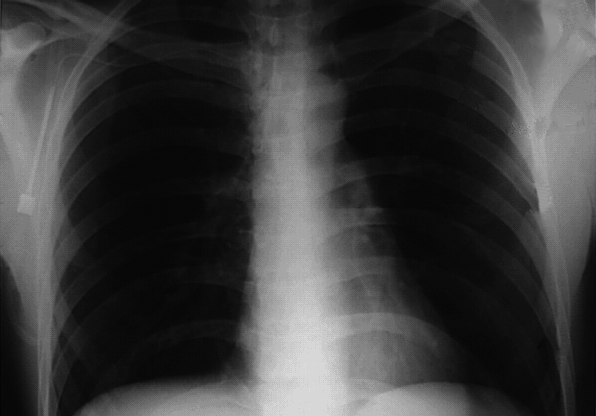

In [2]:
# read the original image
import cv2
from PIL import Image
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, fft2, ifft2
import matplotlib.pyplot as plt

img = Image.open('Fig0459(a)(orig_chest_xray).tif').convert('L')
img

In [3]:

npFFT = np.fft.fft2(img) # Calculate FFT
npFFTS = np.fft.fftshift(npFFT)  # Shift the FFT to center it

In [4]:
#High-pass Gaussian filter
(P, Q) = npFFTS.shape
H = np.zeros((P,Q))
D0 = 40
for u in range(P):
    for v in range(Q):
        H[u, v] = 1.0 - np.exp(- ((u - P / 2.0) ** 2 + (v - Q / 2.0) ** 2) / (2 * (D0 ** 2)))
k1 = 0.5 ; k2 = 0.75
HFEfilt = k1 + k2 * H # Apply High-frequency emphasis
# npFFTS.shape

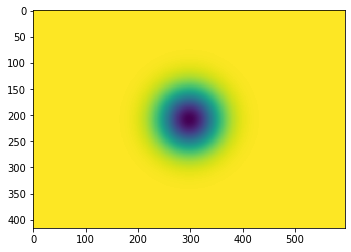

In [5]:
plt.imshow(HFEfilt)

In [6]:
# Apply HFE filter to FFT of original image
HFE = HFEfilt * npFFTS

In [7]:
np.shape(HFE)

(416, 596)

In [8]:
"""
Implement 2D-FFT algorithm

Input : Input Image
Output : 2D-FFT of input image
"""
def fft2d(img):
    # 1) compute 1d-fft on columns
    fftcols = np.array([fft(row) for row in img]).transpose()

    # 2) next, compute 1d-fft on in the opposite direction (for each row) on the resulting values
    return np.array([fft(row) for row in fftcols]).transpose()


#Perform IFFT (implemented here using the np.fft function)
HFEfinal = np.abs(np.conjugate(fft2d(np.conjugate(HFE)))) / (P * Q)

In [9]:
HFEfinal = np.abs(np.conjugate(fft2d(np.conjugate(HFE)))) / (P * Q)

In [10]:
A=np.abs(ifft2(HFEfinal) )


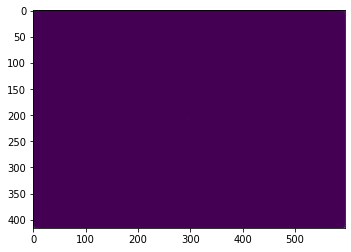

In [11]:
A1=A-np.min(A)
A2=A1/np.max(A1)
plt.imshow(A2)
plt.show()

In [12]:
np.min(A2)

0.0

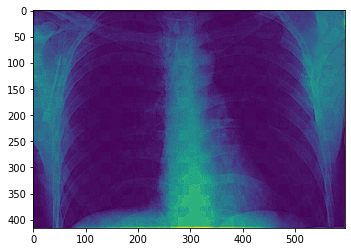

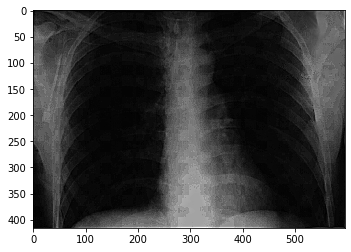

In [13]:
plt.imshow(HFEfinal)
plt.show()
plt.imshow(HFEfinal, cmap='gray')
plt.savefig("out.png")

In [14]:
HFEfinal = HFEfinal - np.min(HFEfinal)
HFEfinal = HFEfinal / np.max(HFEfinal)
HFEfinal1 = (HFEfinal * 255)
cv2.imwrite("out1.png", HFEfinal1)

True

In [15]:
# from scipy.misc import toimage
# toimage(A).show()

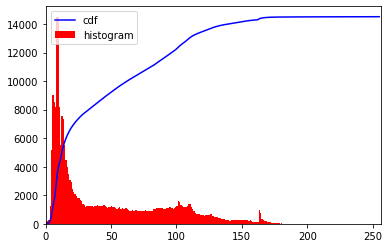

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('out1.png',0)

hist,bins = np.histogram(img1.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [17]:
img1 = cv2.imread('out1.png',0)
equ = cv2.equalizeHist(img1)
res = np.hstack((img1,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

In [18]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

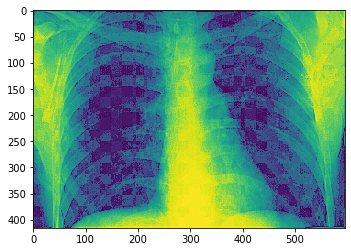

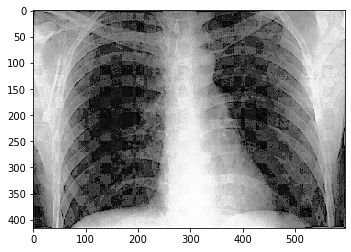

In [19]:
img2 = cdf[img1]
plt.imshow(img2)
plt.show()
plt.imshow(img2, cmap='gray')

In [20]:
# #calculate pdf
# numofpixels = 596*416
# freq= np.zeros(256)
# probf=np.zeros(256)
# for i in range(0, 416):
#     for j in range(0, 516):
#         value = img1[i, j]
#         freq[value] = freq[value] + 1
#         probf[value] = freq[value] / numofpixels

In [21]:
# sum = 0
# num_bins = 255
# # calculate CDF
# for i in range(1, len(probf)):
#     sum = sum + freq[i]
#     cum[i] = sum
#     probc[i] = cum[i] / numofpixels
#     output[i] = round(probc[i] * num_bins)

In [22]:
# for i in range(1, W):
#     for j in range(1, H):
#         histImg[i, j] = output[img1[i, j]]